In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colunas

tenure: tempo de permanencia em meses

paperless: se o cliente optou por receber fatura digital

churn: se cancelou ou nao

charges: valor da *fatura*

#📌 Extracão

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)


In [3]:
 df.head(2) # verificando o dataframe vemos que ele fica com dicionarios nas linhas

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
colunas_normalize = pd.concat([pd.json_normalize(df[col])for col in df.columns],axis=1) # criando colunas novas com os conteudos dos dicionarios que estavam dentros das linhas
colunas_normalize.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [5]:
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),colunas_normalize],axis=1)#axis 1, .drop para juntar(df customerid e churn + o resto)
df.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [6]:
cols_booleanas = ['Churn', 'PaperlessBilling','Dependents','Partner','TechSupport','DeviceProtection','OnlineBackup','StreamingTV','StreamingMovies','PhoneService','MultipleLines','SeniorCitizen']

In [7]:
for i in cols_booleanas:  # mesma coisa que [0:len(cols_booleanas)-1]
    print(f'--- {i} ---')
    valores = df.loc[~df[i].isin(['Yes', 'No',0,1]), i] # poderia usar .dropna() mas ja verifiquei valores NAN antes
    if not valores.empty:
        print(valores.value_counts())
    else:
        print('Nenhum valor diferente encontrado.')
    print()
# Aqui verifica que Churn tem valores vazios

--- Churn ---
Churn
    224
Name: count, dtype: int64

--- PaperlessBilling ---
Nenhum valor diferente encontrado.

--- Dependents ---
Nenhum valor diferente encontrado.

--- Partner ---
Nenhum valor diferente encontrado.

--- TechSupport ---
TechSupport
No internet service    1581
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No internet service    1581
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No internet service    1581
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No internet service    1581
Name: count, dtype: int64

--- StreamingMovies ---
StreamingMovies
No internet service    1581
Name: count, dtype: int64

--- PhoneService ---
Nenhum valor diferente encontrado.

--- MultipleLines ---
MultipleLines
No phone service    707
Name: count, dtype: int64

--- SeniorCitizen ---
Nenhum valor diferente encontrado.



In [8]:
df.isna().sum() # verificando df nulos

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [9]:
for i in df.columns:
    print(f"{i}: {((df[i] == '') | (df[i] == ' ')).sum()}")
# verificando strings vazias

customerID: 0
Churn: 224
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
Charges.Monthly: 0
Charges.Total: 11


In [10]:
df['Churn'] = df['Churn'].replace('', 'UNK') # preenchi com UNK de UNKNOWN
df['Charges.Total'] = df['Charges.Total'].replace(['',' '],'UNK') # preenchi com UNK de UNKNOWN
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool) # passando para booleano

In [11]:
#verificando se funcionou mesmo
for i in df.columns:
    print(f"{i}: {((df[i] == '') | (df[i] == ' ')).sum()}")


customerID: 0
Churn: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
Charges.Monthly: 0
Charges.Total: 0


#📊 Carga e análise

In [12]:
df_plots = df.copy().query('Churn != "UNK"') # unk nao entra no plot
df_plots = df_plots[df_plots['Charges.Total']!='UNK'] # tirando unk do charges.total tambem
df_plots['Charges.Total'] = pd.to_numeric(df_plots['Charges.Total']) # passando para numerico

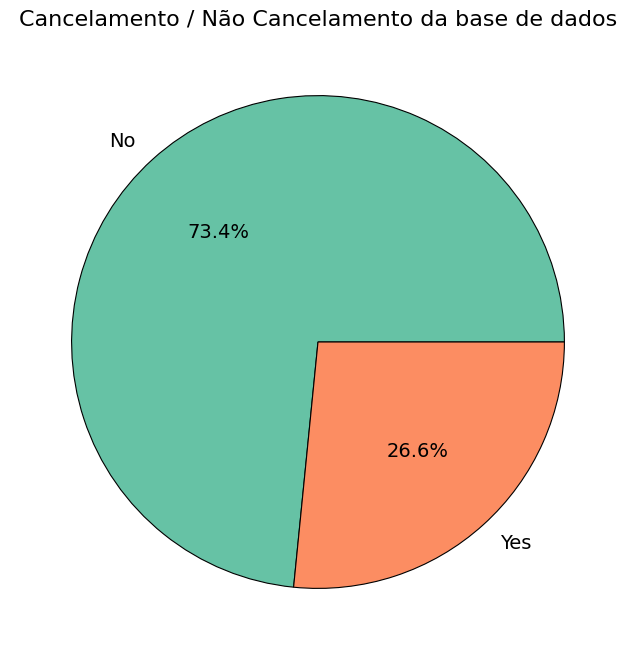

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Set2') # vamos usar uma paleta do sns, pois nao ha o grafico pizza na lib
ax.pie(x=df_plots['Churn'].value_counts(),labels=df_plots['Churn'].value_counts().index,wedgeprops={'edgecolor':'black','linewidth':0.8}
       ,textprops={'fontsize':14},colors=colors, autopct='%1.1f%%' ) #autopct coloca  porcentagem
#usando value_coutns a series tem o indice dos valores yes or no
plt.title('Cancelamento / Não Cancelamento da base de dados',fontsize=16)
plt.show()

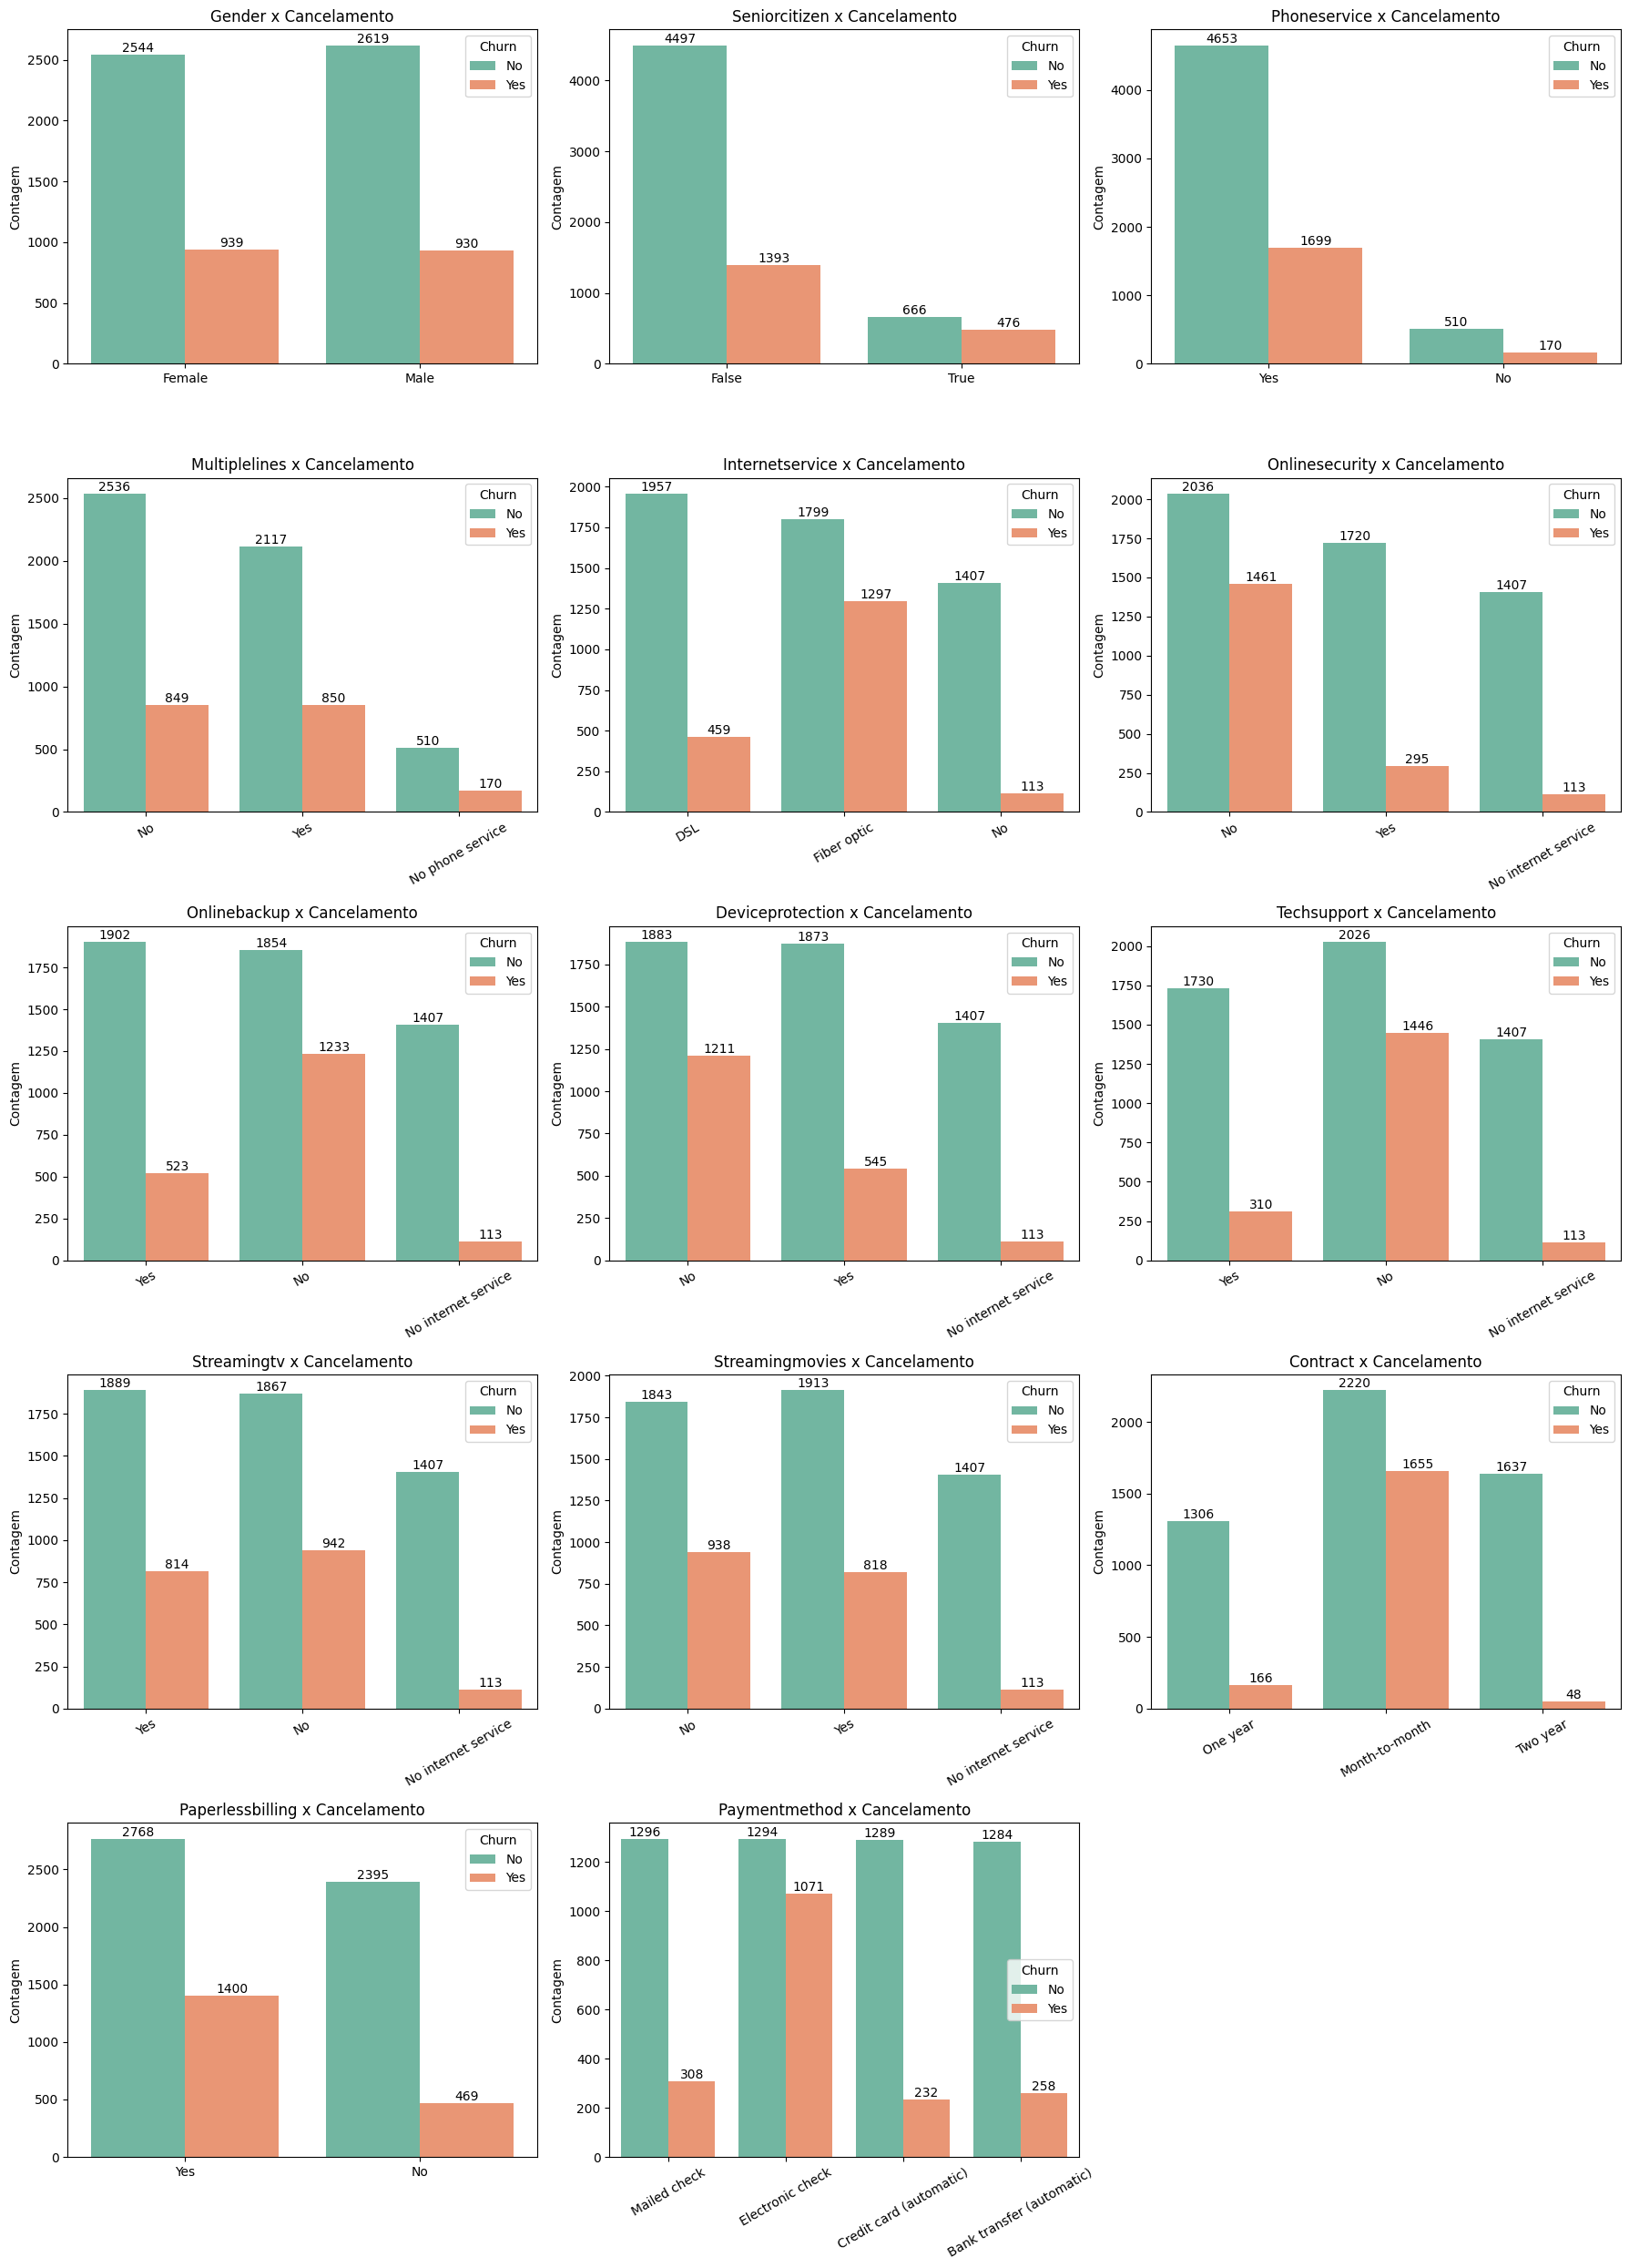

In [14]:

colunas_plot = [ 'gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

# definindo o número de colunas por linha para os subplots
ncols = 3
# calculando o número de linhas necessárias
nrows = (len(colunas_plot) + ncols - 1) // ncols # Arredonda para cima

# Criar a figura e a grade de subplots
# figsize ajustado para ter um tamanho decente para a quantidade de plots
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5))

# Achatandoo array de subplots para facilitar a iteração (de 2D para 1D)
axs = axs.flatten()

# Loop sobre as colunas e seus índices
for i, col in enumerate(colunas_plot):
    # sns.countplot no subplot atual (axs[i])
    sns.countplot(data=df_plots, x=col, hue='Churn', ax=axs[i], palette='Set2')

    # Adicionar título ao subplot
    axs[i].set_title(f'{str(col).capitalize()} x Cancelamento')

    # Remover rótulos do eixo Y e X para evitar poluição visual, se desejar
    axs[i].set_ylabel('Contagem')
    axs[i].set_xlabel('') # Remover rótulo X, pois o título já indica a coluna

    # Adicionar rótulos de contagem nas barras
    for container in axs[i].containers:
        axs[i].bar_label(container, fmt='%d')

    # Rotacionar rótulos do eixo X se houver muitos ou forem longos
    if df_plots[col].nunique() > 2 or max(len(str(x)) for x in df_plots[col].unique()) > 10:
        axs[i].tick_params(axis='x', rotation=30)

# Remover quaisquer subplots vazios, se o número de plots não preencher a grade completamente
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

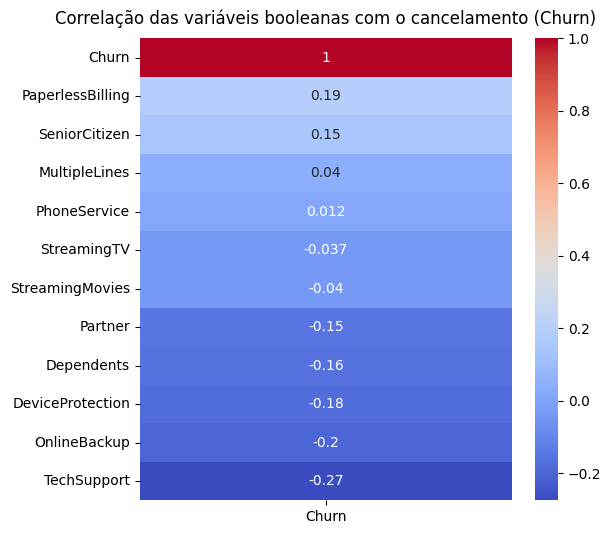

In [15]:
df_bool = df[['Churn', 'PaperlessBilling','Dependents','Partner','TechSupport','DeviceProtection','OnlineBackup','StreamingTV','StreamingMovies','PhoneService','MultipleLines','SeniorCitizen']].copy()

#loop para transformar em booleanas reais
for i in df_bool.columns:
    if i == 'SeniorCitizen':
        df_bool[i] = df_bool[i].astype(bool)
    else:
        df_bool[i] = df_bool[i].map({'Yes': True, 'No': False})

df_bool.head(2)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_bool.corr()[['Churn']].sort_values('Churn',ascending=False), annot=True, cmap='coolwarm')
ax.set_title("Correlação das variáveis booleanas com o cancelamento (Churn)",pad=10)

plt.show()

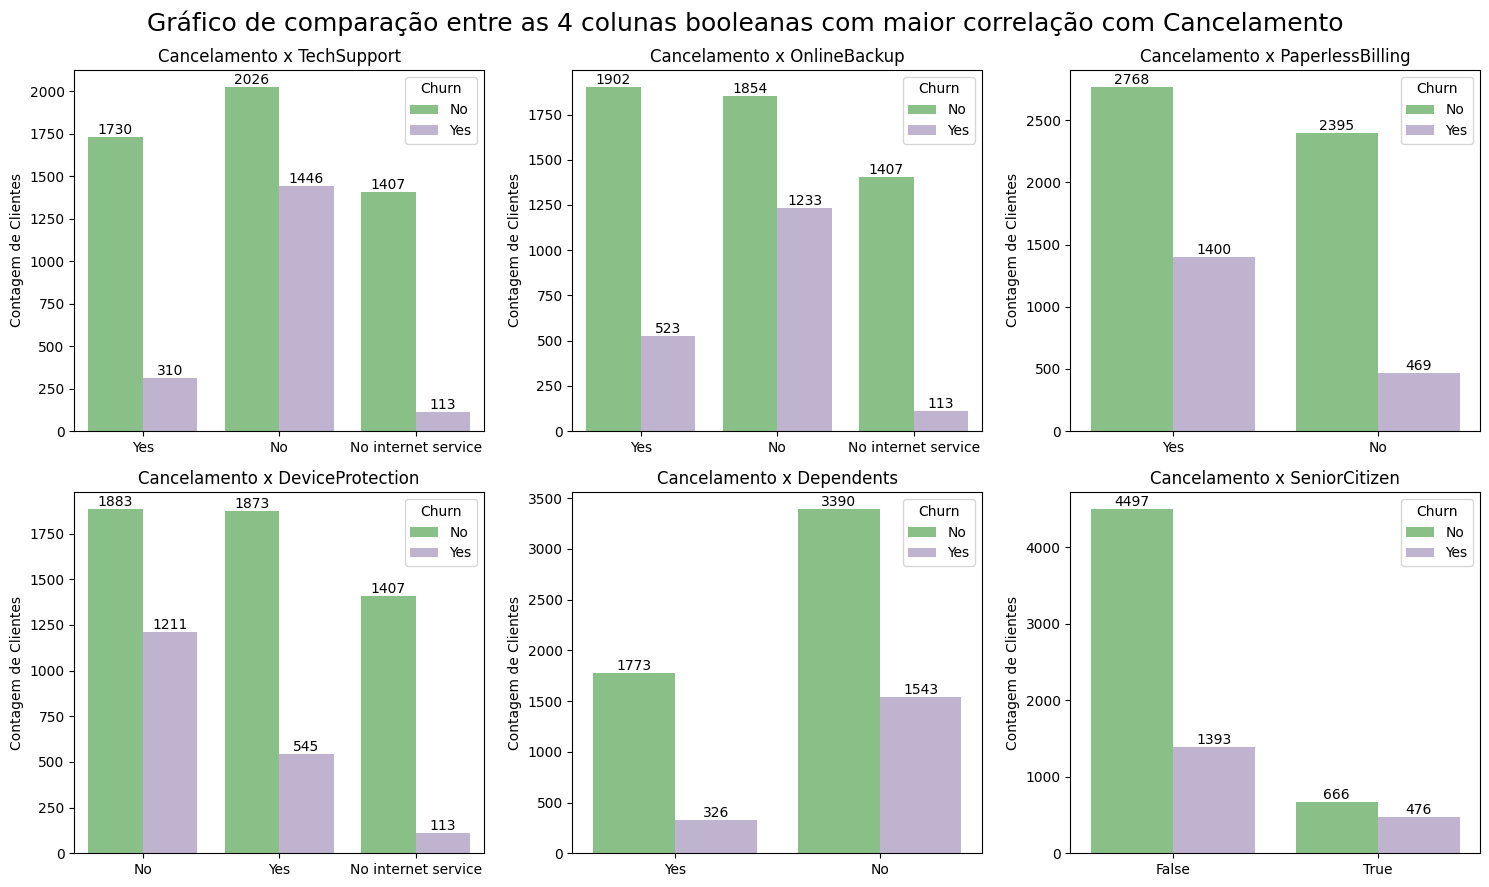

In [16]:
df_bool_corr = df_bool.corr()[['Churn']].sort_values('Churn',ascending=False).drop('Churn', axis=0)
top_4_correlated_cols = df_bool_corr.abs().sort_values(by='Churn', ascending=False).head(6).index.tolist() #extrair os nomes das colunas com maior correlação e converte numa lista


num_cols_to_plot = len(top_4_correlated_cols) # Será 6

# criando a grade de subplots (2x3 é perfeito para 6 plots)
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# achata o array 2D de subplots para 1D, facilitando a iteração
axs = axs.flatten()


# Loop para plotar cada um dos plots
for i, col in enumerate(top_4_correlated_cols):
    # Agora axs[i] referencia um único subplot corretamente
    sns.countplot(data=df_plots, x=col, hue='Churn', ax=axs[i], palette='Accent')
    axs[i].set_title(f'Cancelamento x {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Contagem de Clientes')

    # Adicionar rótulos nas barras
    for container in axs[i].containers:
        axs[i].bar_label(container, fmt='%d')
plt.suptitle('Gráfico de comparação entre as 4 colunas booleanas com maior correlação com Cancelamento',fontsize=18)
plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()

Text(0, 0.5, 'Proporção')

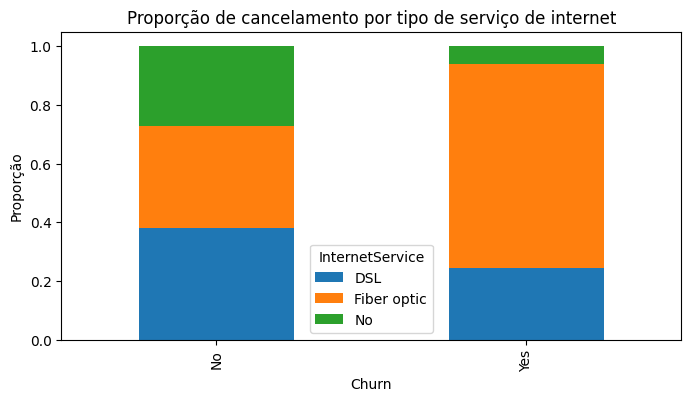

In [17]:
cancelamento_servico_internet = df_plots.groupby(['Churn', 'InternetService']).size().unstack()
cancelamento_contrato = df_plots.groupby(['Churn', 'Contract']).size().unstack()

fig, axs = plt.subplots(1,1,figsize=(8, 4))

# Gráfico de percentual empilhado (serviço de internet)
(cancelamento_servico_internet.T / cancelamento_servico_internet.sum(axis=1)).T.plot(
    kind='bar', stacked=True, ax=axs, title='Proporção de cancelamento por tipo de serviço de internet')
axs.set_ylabel('Proporção')

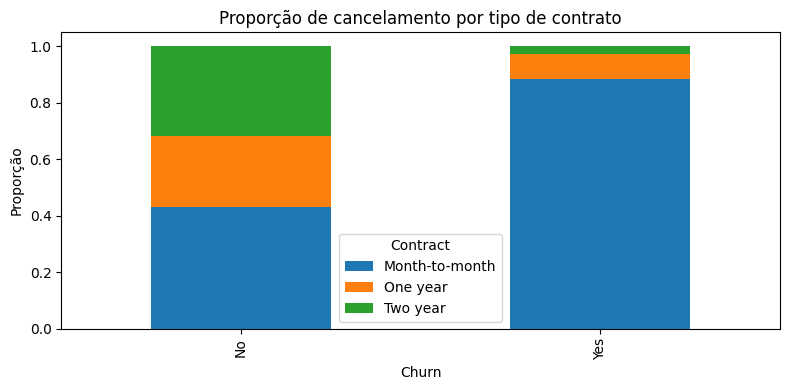

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

(cancelamento_contrato.T / cancelamento_contrato.sum(axis=1)).T.plot(
    kind='bar', stacked=True, ax=axs, title='Proporção de cancelamento por tipo de contrato')

axs.set_ylabel('Proporção')

plt.tight_layout()
plt.show()


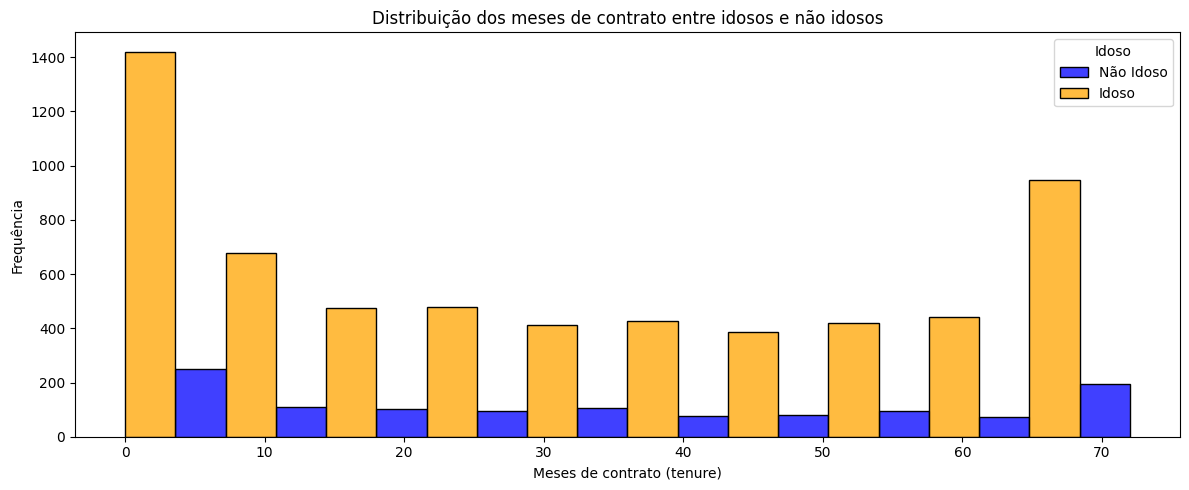

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='tenure', hue='SeniorCitizen', bins=10, multiple='dodge', palette={1: 'blue', 0: 'orange'})
# hue pra dividir os dados em grupos, bins pra definir o número de barrinhas
# no eixo X, e multiple pra decidir se essas barrinhas ficam lado a lado ou uma por cima da outra.

plt.title('Distribuição dos meses de contrato entre idosos e não idosos')
plt.xlabel('Meses de contrato (tenure)')
plt.ylabel('Frequência')
plt.legend(title='Idoso', labels=['Não Idoso', 'Idoso'])
plt.tight_layout()
plt.show()


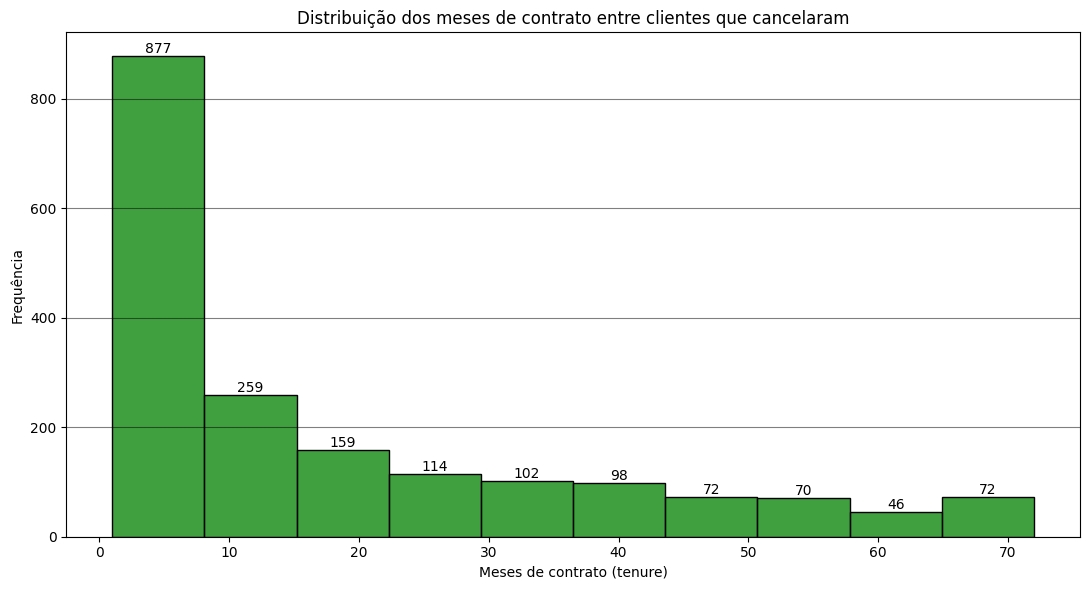

In [20]:
fig, ax = plt.subplots(figsize=(11, 6))

# plotando o histograma apenas para clientes que cancelaram
sns.histplot(data=df_plots[df_plots['Churn'] == 'Yes'], x='tenure', bins=10, ax=ax,color='green')
plt.grid(alpha = 0.5,axis = 'y', color = 'black')
# Título e rótulos
ax.set_title('Distribuição dos meses de contrato entre clientes que cancelaram')
ax.set_xlabel('Meses de contrato (tenure)')
ax.set_ylabel('Frequência')

# Adicionar os números nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # Coloca os números nas barras

plt.tight_layout()  # Ajusta o layout pra não cortar nada
plt.show()


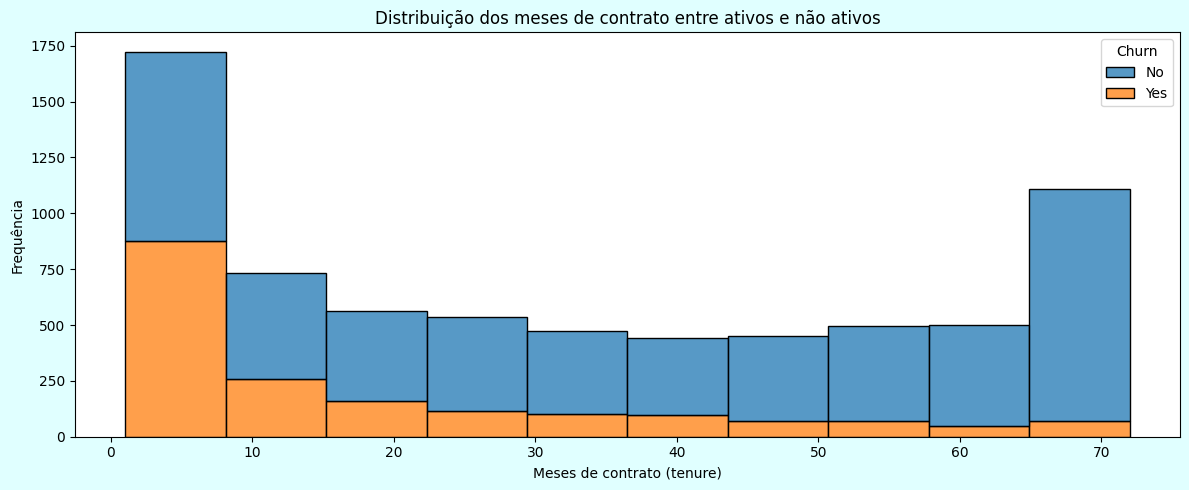

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_plots, x='tenure', hue='Churn', bins=10,multiple='stack')

plt.gcf().set_facecolor('lightcyan')

plt.title('Distribuição dos meses de contrato entre ativos e não ativos')
plt.xlabel('Meses de contrato (tenure)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


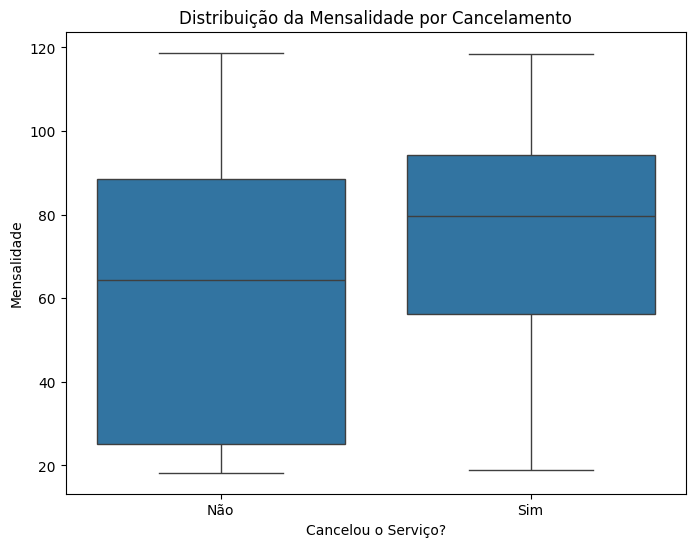

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_plots, x='Churn', y='Charges.Monthly', showfliers=True)
plt.title('Distribuição da Mensalidade por Cancelamento')
plt.xlabel('Cancelou o Serviço?')
plt.ylabel('Mensalidade')
plt.xticks([0, 1], ['Não', 'Sim'])  # define os rótulos corretos
plt.show()


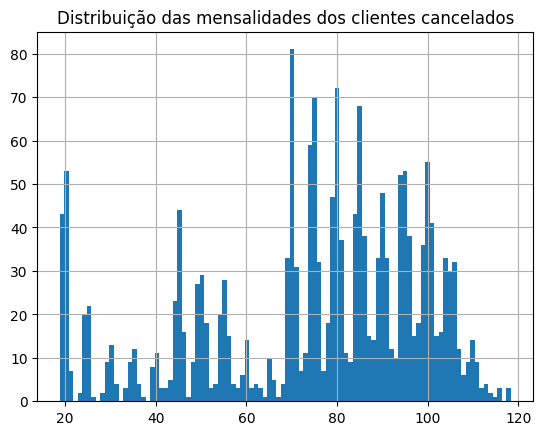

In [23]:
df[df['Churn']=='Yes'].hist(column='Charges.Monthly',bins=100)
plt.title('Distribuição das mensalidades dos clientes cancelados')
plt.show()

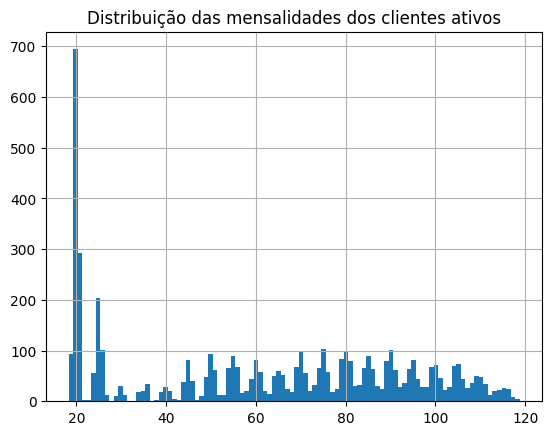

In [24]:
df[df['Churn']=='No'].hist(column='Charges.Monthly',bins=100)
plt.title('Distribuição das mensalidades dos clientes ativos')
plt.show()

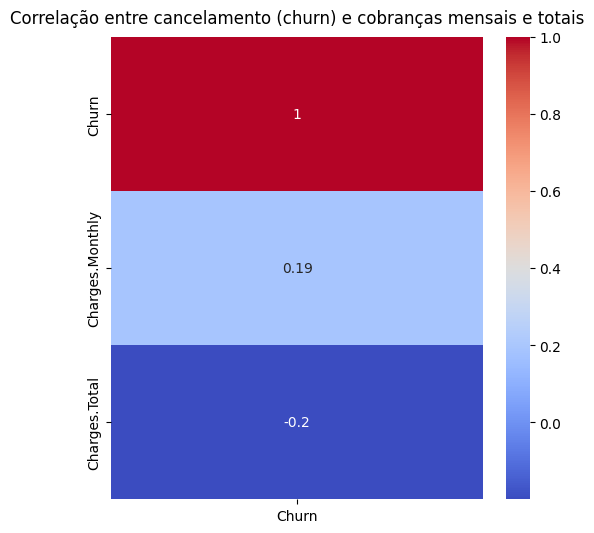

In [25]:
df_bool = df_plots[['Churn', 'Charges.Monthly','Charges.Total']].copy()
df_bool['Churn'] = df_bool['Churn'].map({'Yes': True, 'No': False}) #transformar de str para booleanas reais

df_bool.head(2)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_bool.corr()[['Churn']].sort_values('Churn',ascending=False), annot=True, cmap='coolwarm')
ax.set_title("Correlação entre cancelamento (churn) e cobranças mensais e totais",pad=10)

plt.show()

#📄Relatorio Final

## Limpeza / Tratamento
Foram removidas linhas com valores ausentes ou inconsistentes, especialmente nas colunas Churn e Charges.Total. Os dados foram de 7267 para 7043 registros após esta limpeza.
As variáveis com valores 'yes' or 'no' foram transformadas em booleanas (podendo ser alteradas para binárias em breve).
Os dados foram normalizados e divididos para facilitar a análise.



## 📊 Insights da Análise de Cancelamentos (Churn)
- 26,6% dos clientes da base de dados cancelaram o serviço.

- Clientes idosos, embora sejam minoria na base, estão entre os que mais permanecem, indicando maior lealdade.

- Clientes não idosos apresentam maior taxa de cancelamento.

- Clientes com atendimento técnico incluído no serviço de internet tendem a cancelar com menos frequência.

- Contratos de longa duração estão associados a uma menor taxa de cancelamento.

- A maioria dos cancelamentos ocorre entre clientes com menos de 10 meses de contrato.

- Clientes sem provedor de internet ou com serviço DSL apresentam menor taxa de cancelamento.

- Assinantes de proteção de dispositivo cancelam menos que os que não assinam esse serviço.

## Recomendações:
- Estimular contratos de longo prazo, oferecendo benefícios para fidelização nos primeiros meses.

- Incluir serviços de suporte e segurança como parte dos planos básicos ou como brinde de boas-vindas.

- Reavaliar os planos com mensalidades mais altas para garantir que o cliente perceba valor proporcional ao preço cobrado.